In [1]:
import matplotlib.pyplot as plt
import numpy as np
from sympy import diff, symbols, cos, sin, tan
from scipy.misc import derivative
from scipy.optimize import minimize, differential_evolution
from sklearn.metrics.pairwise import pairwise_distances
from sklearn import decomposition
%matplotlib inline

Задание 1
Дана матрица рейтингов фильмов (строки - пользователи (10 человек), столбцы - фильмы (15 фильмов))
a) Необходимо найти наиболее похожего пользователя по косинусной метрике для каждого из (ответ: 10 пар вида (x, y), где y - наиболее похожий пользователь на пользователя x).

b) Предположим, вы захотели сжать признаковые описания пользователя с 15 фильмов, до, скажем, 5-ти признаков, как вы это сделаете?

In [68]:
raitings = np.array([[ 4,  4,  9,  4,  1,  6, 10,  7,  9,  6,  9,  2,  8,  6,  6],
                     [ 9,  2,  5, 10,  7,  8, 10,  5,  6,  2,  1,  6,  8,  9,  7],
                     [ 1,  6,  8,  8,  4,  9,  3,  8, 10,  5,  2,  6,  8,  1,  6],
                     [ 6,  1,  9,  7,  7,  9,  2,  3,  5,  1,  6,  6,  3,  2,  7],
                     [ 3,  7,  3,  5,  7,  9,  9,  6,  2,  9,  1,  2,  8, 10,  6],
                     [ 8,  3,  7,  3,  8,  6,  1,  8,  8,  6,  1,  9,  4, 10,  1],
                     [ 9,  8,  4,  8,  8, 10,  6,  1,  1,  2,  9,  5,  2,  7,  2],
                     [ 4,  1,  6,  4,  3, 10,  4,  4,  2,  8,  7,  9,  3,  8,  3],
                     [ 2,  7,  7,  6, 10,  6,  8,  9,  8,  6, 10,  1,  7, 10,  4],
                     [ 5, 10,  8,  8,  9,  7,  2,  9,  9, 10,  8,  8,  8,  6, 10]])

D = pairwise_distances(raitings)
D

array([[ 0.        , 15.49193338, 13.78404875, 15.96871942, 15.23154621,
        18.        , 18.46618531, 15.06651917, 11.5758369 , 16.        ],
       [15.49193338,  0.        , 15.87450787, 14.31782106, 13.26649916,
        15.23154621, 15.26433752, 16.09347694, 16.24807681, 17.94435844],
       [13.78404875, 15.87450787,  0.        , 13.07669683, 16.30950643,
        15.8113883 , 19.67231557, 16.21727474, 16.0623784 , 13.03840481],
       [15.96871942, 14.31782106, 13.07669683,  0.        , 18.62793601,
        15.26433752, 13.56465997, 12.80624847, 17.63519209, 16.82260384],
       [15.23154621, 13.26649916, 16.30950643, 18.62793601,  0.        ,
        16.55294536, 16.34013464, 14.73091986, 13.34166406, 16.73320053],
       [18.        , 15.23154621, 15.8113883 , 15.26433752, 16.55294536,
         0.        , 17.57839583, 13.15294644, 16.673332  , 16.37070554],
       [18.46618531, 15.26433752, 19.67231557, 13.56465997, 16.34013464,
        17.57839583,  0.        , 13.85640646

In [71]:
D = pairwise_distances(raitings)
i = 1
for line in D:
    a = min(np.where(line>0, line, np.inf))
    result = np.where(line == a)
    
    print(f"{i} -- {result[0][0]+1}")   
    i+=1

1 -- 9
2 -- 5
3 -- 10
4 -- 8
5 -- 2
6 -- 8
7 -- 4
8 -- 4
9 -- 1
10 -- 3


In [50]:
pca = decomposition.PCA(n_components = 5)
raitings1= pca.fit_transform(raitings)
raitings1

array([[-5.30986101,  1.92919845, -4.93300027,  2.70188013,  5.50497886],
       [ 2.87763403,  2.71659559,  1.40592782,  7.26325751, -4.50322291],
       [-4.94010408, -6.68861167, -0.94550184,  3.61556661, -0.68969272],
       [ 5.14939908, -6.28027284, -4.65978558,  1.09024004, -1.01471112],
       [-1.37488691,  7.54357985,  4.00834369,  2.1284001 , -0.16324949],
       [ 2.65341956, -3.77075601,  8.58430748, -1.46628319,  1.67401769],
       [ 8.61573944,  3.78603335, -4.02721027, -4.37582577, -3.13880277],
       [ 5.39658258, -1.0170466 ,  1.01456742, -1.89512837,  6.54883538],
       [-5.7843488 ,  5.29857107, -1.48083611, -3.71295542,  0.21312695],
       [-7.2835739 , -3.51729118,  1.03318766, -5.34915166, -4.43127987]])

Задание 2¶
Вычислите производную $tg^2(sin(x) + cos(2x+3))$ в точке $x_0=1$ (на python и на бумаге).

In [3]:
x = symbols('x')
def f(x):
    return ((tan(sin(x) +  cos(2 * x + 3))**2))

a = tan(sin(x) +  cos(2 * x + 3))**2
print(derivative(f, 1, n = 1))
diff(a)

57.0653126946030


2*(-2*sin(2*x + 3) + cos(x))*(tan(sin(x) + cos(2*x + 3))**2 + 1)*tan(sin(x) + cos(2*x + 3))

Задание 3
Дана функция с неизвестными параметрами a и b, вам также известны значения функции fx в точках x. Найдите оптимальные параметры a, b, минимизирующие абсолютную ошибку error.

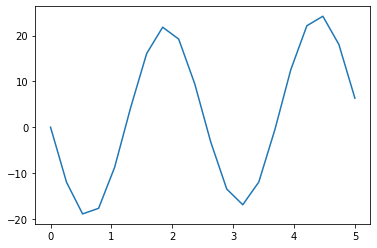

In [26]:
def f(x, a, b):
    return np.e**a * np.sin(b*x) + x

x = np.array([0.        , 0.26315789, 0.52631579, 0.78947368, 1.05263158,
              1.31578947, 1.57894737, 1.84210526, 2.10526316, 2.36842105,
              2.63157895, 2.89473684, 3.15789474, 3.42105263, 3.68421053,
              3.94736842, 4.21052632, 4.47368421, 4.73684211, 5.        ])


fx = np.array([  0.        , -12.01819092, -18.90968634, -17.68786571,
                -8.7529108 ,   4.27524517,  16.06801336,  21.81250213,
                19.22059845,   9.48411207,  -3.22273056, -13.48576488,
               -16.91096359, -11.95866834,  -0.58630088,  12.56873816,
                22.12489421,  24.20292139,  18.04522521,   6.33211092])
plt.plot(x, fx)
plt.show()

In [27]:
def error(params):
    return np.sum(np.abs(fx - f(x, params[0], params[1])))

In [40]:
param = [0,0]
res = minimize(error, param , method = 'COBYLA')
res

     fun: 0.07674566111565184
   maxcv: 0.0
 message: 'Optimization terminated successfully.'
    nfev: 135
  status: 1
 success: True
       x: array([ 3.00018796, -2.50008926])


Задание 4
Создайте собственную дискретную случайную величину с 20 значениями. Сгенерируйте 1000 выборок размера 50. Посчитайте среднее для каждой выборки. Постройте гистограмму распределения средних.

(array([3.27171602e-04, 2.08571896e-03, 4.62129887e-03, 7.07508588e-03,
        1.04694912e-02, 7.89301489e-03, 5.84819238e-03, 1.88123671e-03,
        6.54343203e-04, 4.08964502e-05]),
 array([283.12 , 307.572, 332.024, 356.476, 380.928, 405.38 , 429.832,
        454.284, 478.736, 503.188, 527.64 ]),
 <a list of 10 Patch objects>)

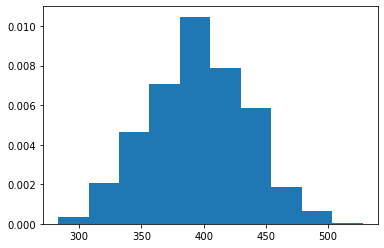

In [15]:
#Создаем собственную дискретную случайную величину

N = np.random.randint(0, 1000, size = 20)
print()
# Массив для сохранения средних по выборкам
means = np.array([])
samples_count = 1000

for number in range(samples_count):
    # На каждом цикле генерируем выборки разных размеров
    sample1 = np.random.choice(N, 50) 
    # Считаем среднее по каждой выборке и добавляем в массив средних
    means = np.append(means, sample1.mean())



plt.hist(means, density=True)


Задание 5
Найдите собственные значения и собственные вектора матрицы (на python и на бумаге):

In [4]:
m = np.array([[1, 4],
              [1, 1]])
v, w = np.linalg.eig(m)
print(f"собственные вектора матрицы {w}")
print(f"собственные значения матрицы {v}")

собственные вектора матрицы [[ 0.89442719 -0.89442719]
 [ 0.4472136   0.4472136 ]]
собственные значения матрицы [ 3. -1.]
